In [54]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import matplotlib.animation as ani
from random import randint
from matplotlib.animation import PillowWriter  as pw
%matplotlib notebook
%matplotlib notebook

In [8]:
def read_data(fp):
    student_df = pd.read_excel(fp, names = ["Name"])
    ans = {}
    new_col = []
    colors = []
    new_lst = sorted(student_df["Name"])

    for x,y in enumerate(new_lst):
        ans[y] = x+1
    for x in student_df["Name"]:
        new_col.append(ans[x])
        colors.append('#%06X' % randint(0, 0xFFFFFF))
    student_df["Position"] = new_col
    student_df["Color"] = colors
    return student_df


In [9]:
def bubblesort(names):
    global num_iter
    swap = 0
    for i in range(len(names)-1):
        for j in range(i+1,len(names)):
            num_iter += 1
            if names.iloc[i][0] > names.iloc[j][0]:
                temp = names.iloc[i]
                names.iloc[i] = names.iloc[j]
                names.iloc[j] = temp
                swap = 1
            yield (names, i, j, swap)
            swap = 0

In [10]:
def display_names(curr):
    plt.clf()
    plt.axis("off")
    objects = curr["Name"]
    y_pos = np.arange(len(objects))
    bars = plt.bar(y_pos, height = curr["Position"], align='center', color = 'w', width = 0.005)
    for i in range(len(bars)):
        yval = bars[i].get_height()
        plt.text(bars[i].get_x(), yval + .1, curr["Name"][i], fontsize=15, ha='center', color = curr["Color"][i])
    plt.xlabel('Students')
    plt.title("Bubble Sort!\n" + str(num_iter))
    return bars 


In [11]:
def buildbarchart(i):
    global prev
    try:
        curr, x , y, swap = next(zz)
        prev = curr
        
        bars = display_names(curr)
        c = 'r'
        if swap:
            c = 'g'
        bars[x].set_color(c)
        bars[y].set_color(c)
        plt.hlines(y=0, xmin=bars[x].get_x(), xmax=bars[y].get_x(), linewidth=2, color=c)

    except:
        display_names(prev)

<IPython.core.display.Javascript object>


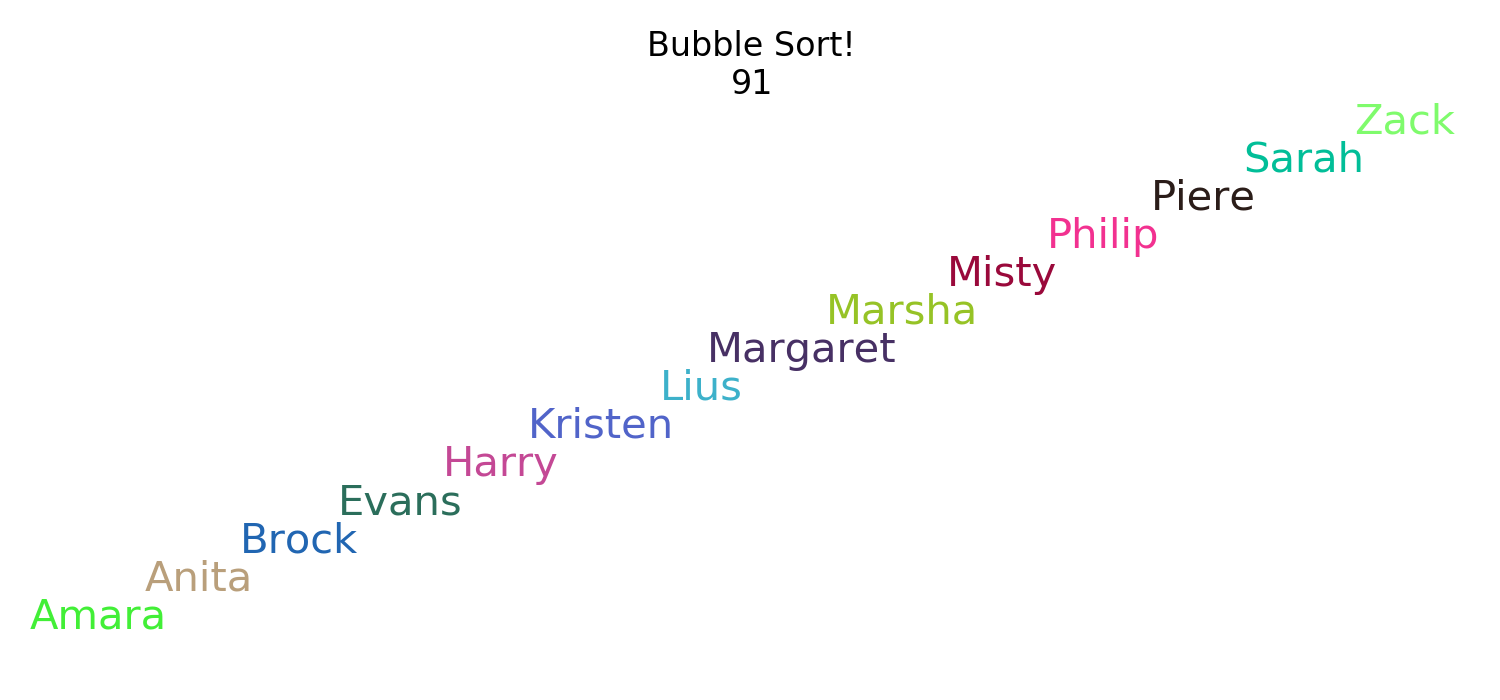

In [57]:
num_iter = 0
dup = student_df.copy(deep=True)
zz = bubblesort(dup)
prev = None
fig = plt.figure() 
speed = 200
animator = ani.FuncAnimation(fig, buildbarchart, interval=speed)


# remove the '#' below to save your animation asa gif!


#plt.show()
#animator.save("sorted_class.gif", fps=80, writer='pillow')